# **MÓDULO 32 - Exercício**
# Random Forest


Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [4]:
#seu código aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
(df.isnull().sum()/len(df))*100

,0
fixed acidity,0.0
volatile acidity,0.0
citric acid,0.0
residual sugar,0.0
chlorides,0.0
free sulfur dioxide,0.0
total sulfur dioxide,0.0
density,0.0
pH,0.0
sulphates,0.0


Sem a necessidade de transformação, já que a base conta com 0% em todas as colunas de dados nulos

# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


In [6]:
#seu código aqui
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Possíveis outliers identificados nas colunas: free sulfur dioxide, total sulfur dioxide e residual sugar

In [7]:
fig = px.box(df, y=['free sulfur dioxide','total sulfur dioxide', 'residual sugar'])
fig.show()

##Vamos trabalhar por partes para a explicação do motivo da retirada de alguns valores que são considerados outliers.


###1.   Free sulfur dioxide (dióxido de enxofre livre)
####Após pesquisas obtive a informação de que o valor de 72g de free sulfur dioxide (dióxido de enxofre livre) ultrapassa o limite em muitos países, mas principalmente no Canadá e no Brasil, não que não seria possível de haver um vinho assim, mas que seria ilegal. Por tanto utilizarei o limite posto sobre o Canadá e Brasil que é de 70mg.
---
###2.   Total sulfur dioxide (dióxido de enxofre total)
#### Para o total sulfur dioxide (dióxido de enxofre total) o limite é diferente em muitos países o limite é de 200 e para o Canadá e Brasil que estamos utilizando de base se limita a 350mg/L porém como todo o restante da base está com valores muito abaixo irei optar pela exclusão para não enviesar nosso modelo e nem trazer dados que não condizem com a realidade.
---
###3.   Residual sugar
####Também com base nas pesquisas que realizei no Residual sugar não existe outliers já que para vinhos doces os resíduos podem chegar até em 85mg, então não farei a exclusão destes dados
---
###Conclusão:
####Farei a exclusão por se tratarem de poucos dados então não terá tanta diferença dentro da nossa base.


In [8]:
df.drop(df[df['free sulfur dioxide'] > 70].index, inplace = True)
df.drop(df[df['total sulfur dioxide'] > 165].index, inplace = True)

In [9]:
fig = px.box(df, y=['free sulfur dioxide','total sulfur dioxide', 'residual sugar'])
fig.show()

####Exclusão feita.

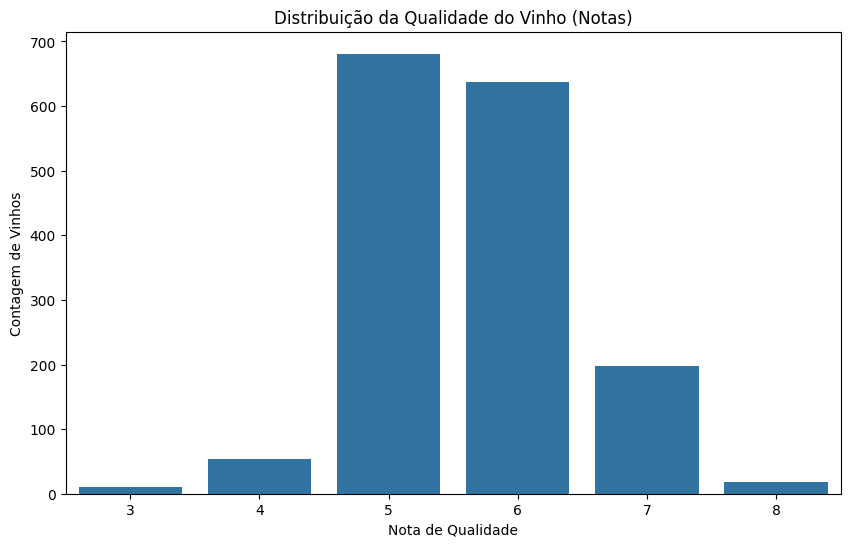

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribuição da Qualidade do Vinho (Notas)')
plt.xlabel('Nota de Qualidade')
plt.ylabel('Contagem de Vinhos')
plt.show()

In [11]:
target_counts = df['quality'].value_counts().sort_index()
target_proportions = df['quality'].value_counts(normalize=True).sort_index() * 100

balance_df = pd.DataFrame({
    'Contagem': target_counts,
    'Proporção (%)': target_proportions.round(2)
})

print("\n--- Balanceamento da Variável Target ---")
print(balance_df)


--- Balanceamento da Variável Target ---
         Contagem  Proporção (%)
quality                         
3              10           0.63
4              53           3.32
5             681          42.67
6             637          39.91
7             197          12.34
8              18           1.13


Atualmente está desbalanceado

In [12]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['quality'].sort_values(ascending=False)

print("Correlação das Variáveis")
print(target_correlation)

Correlação das Variáveis
quality                 1.000000
alcohol                 0.474272
sulphates               0.254076
citric acid             0.222988
fixed acidity           0.125268
residual sugar          0.002991
pH                     -0.053866
free sulfur dioxide    -0.057334
chlorides              -0.127392
density                -0.171675
total sulfur dioxide   -0.209452
volatile acidity       -0.388817
Name: quality, dtype: float64


###Com a variável target as correlações mais fortes são de alcohol, sulphates e citric acid. Que são as 3 mais fortes em seguida vem fixed acidity e residual sugar.

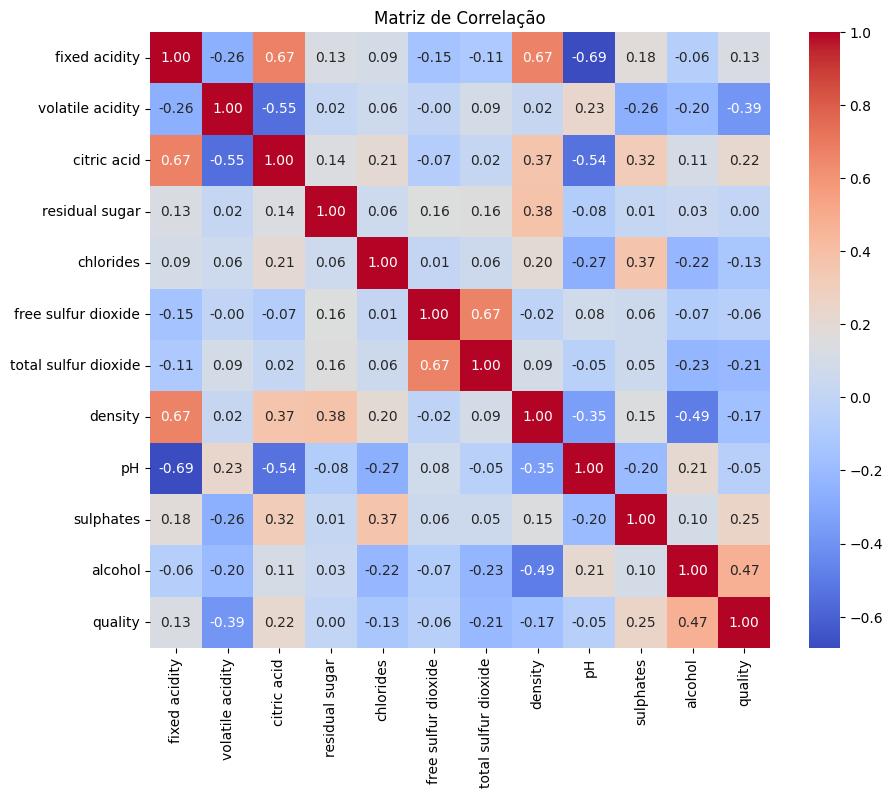

In [13]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### Já utilizando todos os parâmetros podemos destacar também:
####1.  32% sulphates com citric acid
####2.  37% sulphates com chlorides
####3.  21% alcohol com pH
####4.  67% desity com fixed acidity
####5.  37% density com citric acid
####6.  38% density com residual sugar
####7.  67% free sulfur dioxide com total sulfur


In [14]:
colunas_preditoras_selecionadas = ['alcohol','volatile acidity','sulphates','citric acid','total sulfur dioxide','density','chlorides']

colunas_selecionadas = colunas_preditoras_selecionadas + ['quality']
df_reduzido = df[colunas_selecionadas].copy()

print("DataFrame com Variáveis de Maior Correlação")
print(f"Variáveis selecionadas (Target e Preditoras): {df_reduzido.columns.tolist()}")
print("\nPrimeiras 5 linhas do novo DataFrame:")
print(df_reduzido.head())
print(f"\nO DataFrame possui {df_reduzido.shape[1]} colunas e {df_reduzido.shape[0]} linhas (registros).")

DataFrame com Variáveis de Maior Correlação
Variáveis selecionadas (Target e Preditoras): ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'total sulfur dioxide', 'density', 'chlorides', 'quality']

Primeiras 5 linhas do novo DataFrame:
   alcohol  volatile acidity  sulphates  citric acid  total sulfur dioxide  \
0      9.4              0.70       0.56         0.00                  34.0   
1      9.8              0.88       0.68         0.00                  67.0   
2      9.8              0.76       0.65         0.04                  54.0   
3      9.8              0.28       0.58         0.56                  60.0   
4      9.4              0.70       0.56         0.00                  34.0   

   density  chlorides  quality  
0   0.9978      0.076        5  
1   0.9968      0.098        5  
2   0.9970      0.092        5  
3   0.9980      0.075        6  
4   0.9978      0.076        5  

O DataFrame possui 8 colunas e 1596 linhas (registros).


# 3 - Preparação Final dos Dados

A) Separe a base em X(Features) e Y(Target)

B) Separe a base em treino e teste.


In [15]:
#seu código aqui
X = df_reduzido.drop('quality', axis=1)
y = df_reduzido['quality']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4 - Modelagem

A) Inicie e treine o modelo de Random Forest

B) Aplique a base de teste o modelo.


In [17]:
df_reduzido = RandomForestClassifier(random_state=42)
df_reduzido.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
Y_pred = df_reduzido.predict(X_test)

# 5 - Avaliação

A) Avalie as principais métricas da Claissificação e traga insights acerca do resultado, interprete os valores achados.

B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.


In [20]:
accuracy = accuracy_score(y_test, Y_pred)
report = classification_report(y_test, Y_pred)
conf_matrix = confusion_matrix(y_test, Y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 0.65
Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.72      0.75      0.73       204
           6       0.61      0.72      0.66       191
           7       0.59      0.39      0.47        59
           8       0.50      0.17      0.25         6

    accuracy                           0.65       479
   macro avg       0.40      0.34      0.35       479
weighted avg       0.63      0.65      0.64       479

Matriz de Confusão:
 [[  0   1   2   0   0   0]
 [  0   0  13   3   0   0]
 [  0   0 152  51   1   0]
 [  0   1  42 137  11   0]
 [  0   0   2  33  23   1]
 [  0   0   0   1   4   1]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##Objetivo: Prever as notas dos vinhos
###Avaliações:
Inicialmente obtemos 65% de acurácia, não é um valor muito ruim, mas ele pode melhorar. Entendemos que nosso modelo está acertando 65% perante todo o modelo, mas existem outro métodos de tirar a prova real disto, levando em consideração as notas a serem previstas.
Podemos perceber que as métricas de precisão terá alguns resultados bem positivos, porém não obteve nenhuma para as notas mais baixas assim como para o restante das métricas. Isto indica que nosso modelo por estar desbalanceado se torna enviesado a realizar previsões para notas mais altas e podemos perceber isso com o valor retornado das outras métricas como o recall acima de 70% para as notas onde possuem mais dados e F1-score também com mais de 60%. Podemos concluir que por conta da falta d ebalanceamento dos nossos dados existe sim um enviesamento do nosso modelo, sendo assim não podemos nem mesmo avaliar o comportamento do modelo, pois ele não consegue se abranger a todas as classes que devem ser previstas.


# 5 - Melhorando os Hyperparametros

A) Defina o Grid de parametros que você quer testar

B) Inicie e Treine um novo modelo utilizando o random search.

C) Avalie os resultados do modelo.

D) Você identificou melhorias no modelo após aplicar o random search? Justifique.


ps. Essa parte da atividade demorará um pouco para rodar!

In [23]:
#seu código aqui
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

print("Grid de Parâmetros Definido")
print(f"Total de combinações a serem testadas: {np.prod([len(v) for v in param_grid.values()])}")

Grid de Parâmetros Definido
Total de combinações a serem testadas: 576


Utilizei o 'class_weight' para manter o mesmo peso para as clases desbalanceadas

In [24]:
rf = RandomForestClassifier(random_state=42)

In [25]:
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='f1_weighted'
)

print(" Iniciando o Treinamento com Randomized Search")

 Iniciando o Treinamento com Randomized Search


In [26]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='f1_weighted', verbose=2)

In [27]:
best_rf_model = rf_random.best_estimator_
print("\nRandomized Search Concluído.")
print(f"Melhores Parâmetros Encontrados: {rf_random.best_params_}")


Randomized Search Concluído.
Melhores Parâmetros Encontrados: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}


Após descobrir o melhor modelo e os melhores parâmetros, vamos avaliar os resultados do modelo

In [28]:
y_pred_tuned = best_rf_model.predict(X_test)

In [29]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned, zero_division=0)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print(f"Acurácia (Modelo Tunado): {accuracy_tuned:.4f}")
print("Relatório de Classificação (Modelo Tunado):\n", report_tuned)
print("Matriz de Confusão (Modelo Tunado):\n", conf_matrix_tuned)

Acurácia (Modelo Tunado): 0.6660
Relatório de Classificação (Modelo Tunado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.50      0.06      0.11        16
           5       0.74      0.75      0.75       204
           6       0.62      0.70      0.65       191
           7       0.59      0.51      0.55        59
           8       0.50      0.17      0.25         6

    accuracy                           0.67       479
   macro avg       0.49      0.36      0.38       479
weighted avg       0.66      0.67      0.65       479

Matriz de Confusão (Modelo Tunado):
 [[  0   0   2   1   0   0]
 [  0   1  10   5   0   0]
 [  0   0 154  48   2   0]
 [  0   1  41 133  16   0]
 [  0   0   1  27  30   1]
 [  0   0   0   2   3   1]]


###D)
Com o randomized search após encontrar o modelo conjunto ideal de parâmetros houve uma melhora sim, a acurácia que antes era 65% subiu para 66,60% não é um ganho significativo, porém acredito que se trata mais sobre um refinamento das decisões do modelo quanto a prevsões a serem feitas. Ainda acredito que o modelo se encontra sim enviesado para as notas 6 e 5 já que as métricas de avaliação para essas classes se mantiveram altas, e, mostra que o modelo está bem ajustado quanto aos dados que possui em abundância.
Além disto foi possível perceber também que passou-se a ter uma performance mesmo que baixa para a nota 4, enquanto a 3 se manteve zerada, mesmo com a baixa performance apesar de ser um ganho ele ainda aponta para o maior problema que enfrentamos nesta imputação de modelo. Acredito que existem features críticas com valores muito negativos e isto acaba por confundir nosso modelo para diferenciar as notas dos vinhos como por exemplo a coluna: "volatile acidity".
Sendo assim acredito que a melhor decisão a ser tomada é a utilização do SMOTE e também uma reavaliação das features.


# 6 - Chegando a perfeição

Baseado em tudo que você já aprendeu até agora, quais outras técnicas você acredita que poderiam ser aplicadas ao modelo para melhorar ainda mais suas previsões?

Como citei acima acredito que uma reavaliação das features juntamente com a boa prática de balanceamento para este notebook em específico nos traria a possibilidade de um modelo melhor onde pudesse não apenas separar melhor como cada nota deve ser dada, mas também o porque de cada uma com uma previsão completa. Obviamente que não alcançaremos 100% de acerto, porém acredito que ainda assim o modelo obteria melhores resultados.